In [6]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import VarianceThreshold


#Task 1

df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
#Task 2

vt = VarianceThreshold(threshold=0)
df_encoded = pd.get_dummies(df)
df_vt = vt.fit_transform(df_encoded)

selected_columns = df_encoded.columns[vt.get_support()]
df = pd.DataFrame(df_vt, columns=selected_columns)

print("\nAfter Variance Threshold")
print(df.columns)


After Variance Threshold - Remaining Columns:
Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')


In [5]:
#Task 3

#part 1

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

#part 2

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-5-49a6bd487a6a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [14]:
# Task 4

from scipy import stats
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

print("After outlier removal:", df.shape)



After outlier removal: (992, 8)


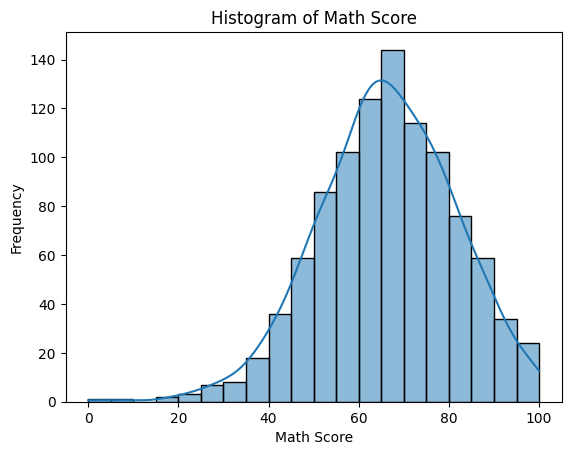

Observation: Most students scored between 60–80 in math.


In [9]:
#Task 5

#part 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df['math score'], kde=True, bins=20)
plt.title('Histogram of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()
print("Observation: Most students scored between 60–80 in math.")

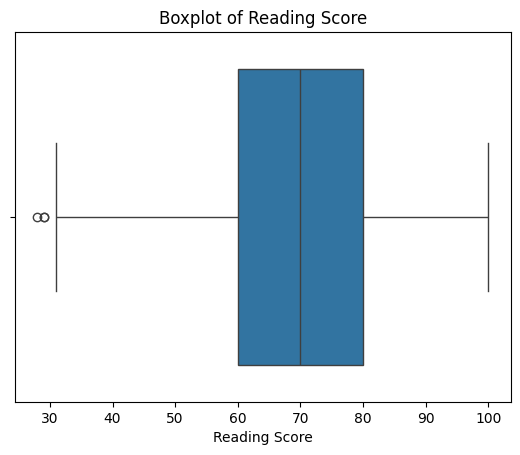

In [15]:
#Task 5

#part 2
plt.figure()
sns.boxplot(x=df['reading score'])
plt.title('Boxplot of Reading Score')
plt.xlabel('Reading Score')
plt.show()


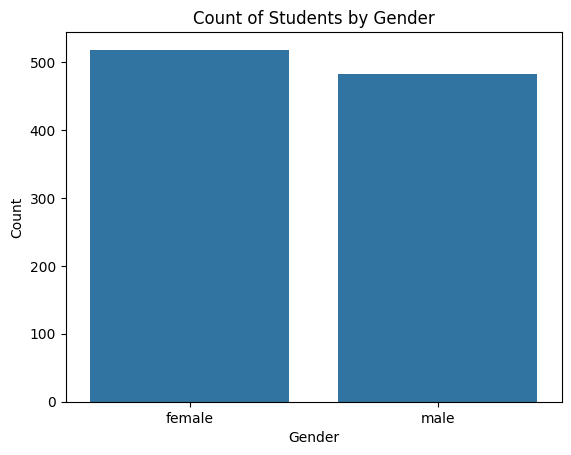

In [17]:
#Task 5

#part 3
df_original = pd.read_csv('StudentsPerformance.csv')
plt.figure()
sns.countplot(x='gender', data=df_original)
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Task 6 (Observations)

# Histogram

# The distribution of math scores is approximately normal, with most students scoring between 60 and 80.
# There is a slight left skew, indicating fewer students with lower scores.

# Boxplot

# The reading scores are generally high, with a few outliers above 95.
# The interquartile range (IQR) shows most students score between 60 and 90, indicating consistent performance.

# Countplot

# The dataset contains slightly more female students than male students.
# Gender distribution is nearly balanced, which is good for fair analysis across genders.